In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
# load the data
df = pd.read_csv('datasets/groceries.csv')
df.head()


,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14


In [3]:
# check the nan values
df.isnull().sum()

Month              0
Rice               0
Wheat              0
Barley             0
Corn               0
Peanuts            0
Sugar              0
Coconut-oil        0
Palm-oil           0
Sunflower-oil    141
Chicken            0
Beef               0
Pork              39
Fish              39
Tea                0
Coffee             0
dtype: int64

### Deal with NaN value

In [4]:
# Fill out miss values of Sunflower oil, Pork Fish  with the mean 

median_imputer  = SimpleImputer(strategy='mean')
df['Sunflower-oil'] = median_imputer.fit_transform(df[['Sunflower-oil']])
df['Pork'] = median_imputer.fit_transform(df[['Pork']])
df['Fish'] = median_imputer.fit_transform(df[['Fish']])

In [5]:
df.isnull().sum()

Month            0
Rice             0
Wheat            0
Barley           0
Corn             0
Peanuts          0
Sugar            0
Coconut-oil      0
Palm-oil         0
Sunflower-oil    0
Chicken          0
Beef             0
Pork             0
Fish             0
Tea              0
Coffee           0
dtype: int64

### Split the Month-column to  different columns: Month and Year

In [6]:
# This code is taken from Moodle

# we need the calendar module for this one
import calendar

# function one, this fixes the month
# luckily Python has a module called calendar
# which can convert these abbrevations to numbers
def change_month(row):
    return list(calendar.month_abbr).index(row['Month'])


# function two
# fill in the missing part of the year
def fix_year(row):
    year = int(row['Year'])
    if year > 50:
        return int(f"19{row['Year']}")
    else:
        return int(f"20{row['Year']}")


# before you apply the functions to year and month, we need
# to split the original date into two columns:

# if using Python 3.9, try this if the code doesn't work
# df[['Month', 'Year']] = df['Month'].str.split('-', 1, expand=True)
df[['Month', 'Year']] = df['Month'].str.split('-', expand=True)

In [7]:
# apply the change_month function
df['Month'] = df.apply(change_month, axis=1)

In [8]:
# apply the fix_year function
df['Year'] = df.apply(fix_year, axis=1)

In [9]:
df.head()

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee,Year
0,10,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24,1990
1,11,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22,1990
2,12,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24,1990
3,1,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16,1991
4,2,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14,1991


In [10]:
# Creating correlation matrix
corr = df.corr()
corr

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee,Year
Month,1.000000,-0.044979,-0.013236,-0.030244,-0.044408,-0.001781,0.003578,-0.040258,-0.046552,-0.005825,-0.015935,0.006254,-0.049440,-0.080344,-0.030672,-0.000688,-0.037605
Rice,-0.044979,1.000000,0.764992,0.725854,0.820150,0.696030,0.704375,0.646414,0.793909,-0.082812,0.652289,0.616056,0.348913,0.473308,0.643568,0.567478,0.599948
Wheat,-0.013236,0.764992,1.000000,0.892162,0.890443,0.580613,0.640290,0.618246,0.822121,-0.063324,0.646178,0.528809,0.398452,0.407069,0.477763,0.547567,0.521170
Barley,-0.030244,0.725854,0.892162,1.000000,0.907648,0.609116,0.620424,0.529652,0.792855,-0.025409,0.619077,0.432840,0.386439,0.296844,0.507331,0.448200,0.485134
Corn,-0.044408,0.820150,0.890443,0.907648,1.000000,0.710431,0.755538,0.680974,0.837823,0.007242,0.678824,0.615079,0.479255,0.466458,0.631756,0.562999,0.570409
Peanuts,-0.001781,0.696030,0.580613,0.609116,0.710431,1.000000,0.611945,0.603114,0.684083,-0.155459,0.498765,0.628254,0.439308,0.393605,0.549859,0.420156,0.511999
Sugar,0.003578,0.704375,0.640290,0.620424,0.755538,0.611945,1.000000,0.691739,0.761629,-0.078173,0.564009,0.566042,0.376719,0.607986,0.673708,0.584662,0.514721
Coconut-oil,-0.040258,0.646414,0.618246,0.529652,0.680974,0.603114,0.691739,1.000000,0.835128,0.007093,0.659971,0.662576,0.276655,0.608828,0.662326,0.612844,0.646190
Palm-oil,-0.046552,0.793909,0.822121,0.792855,0.837823,0.684083,0.761629,0.835128,1.000000,-0.086490,0.645418,0.560498,0.278544,0.506403,0.620940,0.709686,0.574697
Sunflower-oil,-0.005825,-0.082812,-0.063324,-0.025409,0.007242,-0.155459,-0.078173,0.007093,-0.086490,1.000000,0.042563,-0.172918,0.024800,-0.310311,0.005189,-0.095457,0.046572


### Which grocery stands out?
Sunflower-oil, it has weak relationship.

### Which groceries seem to correlate to each other's prices? What do they have in common?
## Year has strong correlation to each columns! 
1. Wheat and Barley (0.89):  They both belong to the grass family
2. Corn and Barley (0.91): The demand for barley as a substitute for corn in livestock feed will remain a significant price determinant.
3. Palm-oil and Coconut-oil (0.84): Coconut oil is derived from the coconut fruit
4. Rice and Corn (0.82): They're all part of the grass family (Poaceae) and are responsible for feeding humankind more than any other group of plants.
5. Chicken and Beef (0.78):chicken has become relatively cheaper compared to beef.
### What they have in common:
Grains (like wheat, corn, barley): Similar farming conditions and usage.<br>
Oils (palm and coconut): Both are used in cooking and follow similar supply-demand trends.<br>
Proteins (chicken and beef): Substitutable in diets, so their prices often move together.<br>

Sources: Searching on Google,

### Extra Task

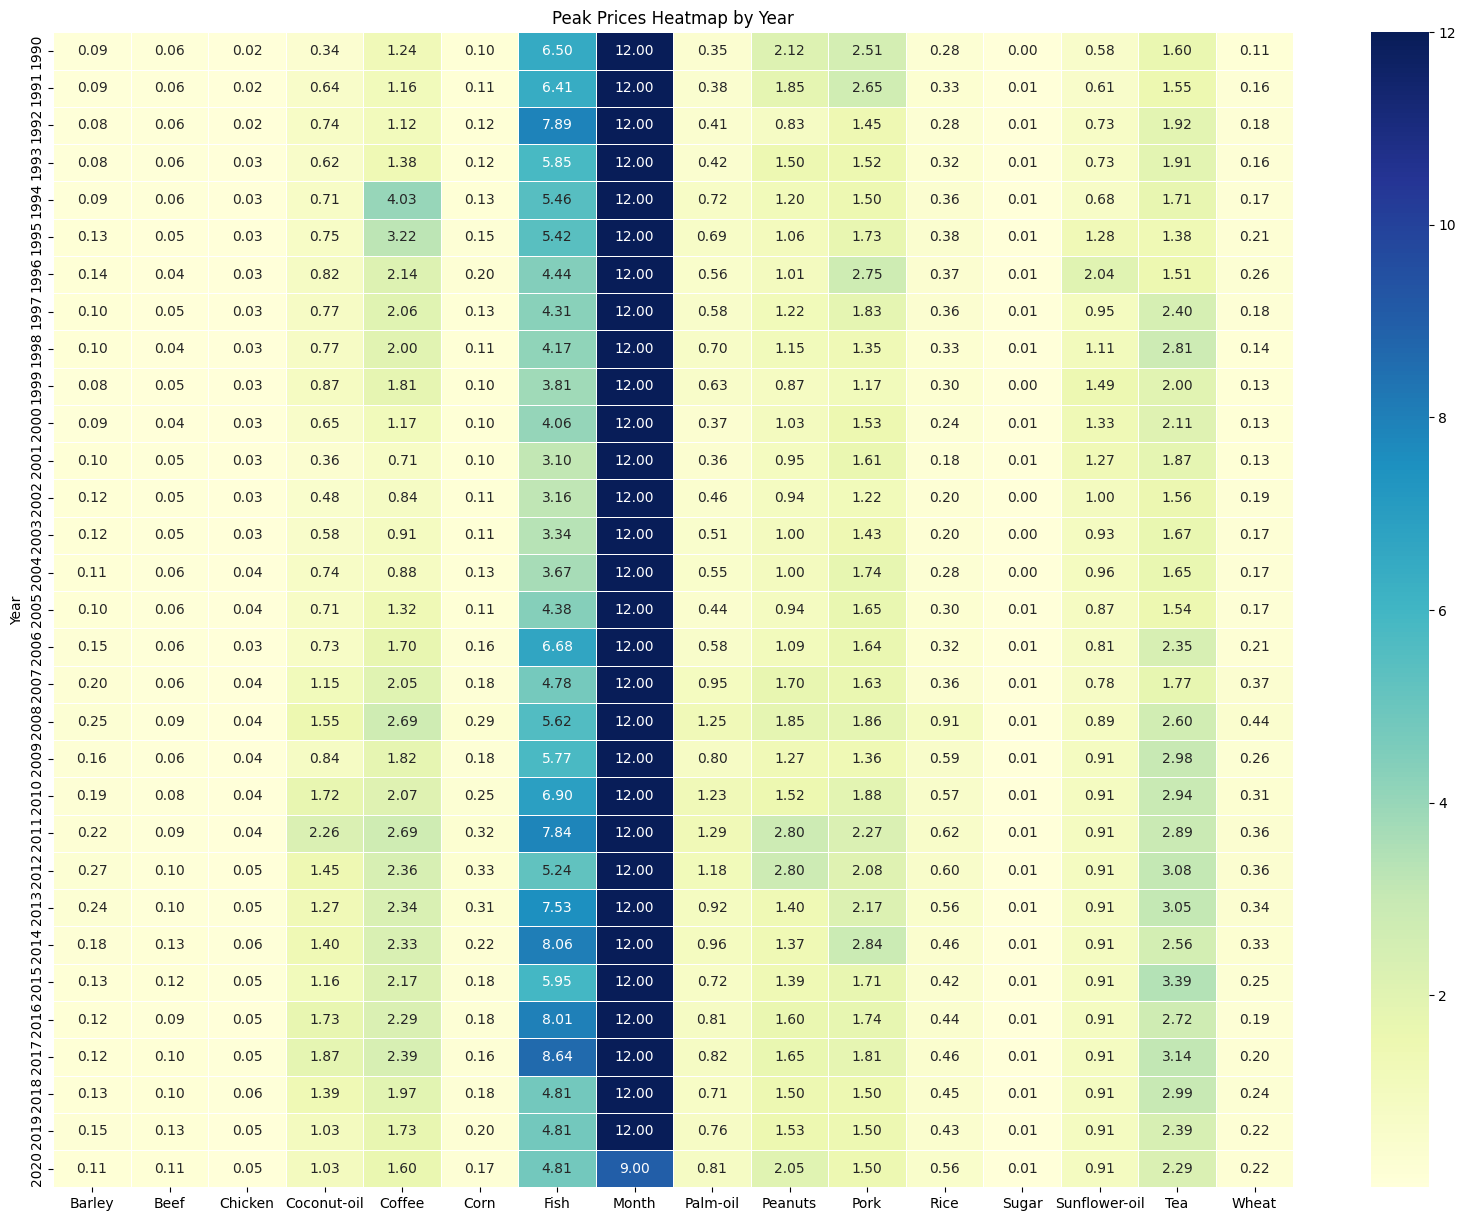

,Barley,Beef,Chicken,Coconut-oil,Coffee,Corn,Fish,Month,Palm-oil,Peanuts,Pork,Rice,Sugar,Sunflower-oil,Tea,Wheat
Year,,,,,,,,,,,,,,,,
1990,0.09,0.0571,0.0236,0.34,1.24,0.10,6.50,12,0.35,2.12,2.5051,0.28,0.0049,0.58,1.60,0.11
1991,0.09,0.0604,0.0238,0.64,1.16,0.11,6.41,12,0.38,1.85,2.6495,0.33,0.0051,0.61,1.55,0.16
1992,0.08,0.0567,0.0240,0.74,1.12,0.12,7.89,12,0.41,0.83,1.4467,0.28,0.0051,0.73,1.92,0.18
1993,0.08,0.0622,0.0282,0.62,1.38,0.12,5.85,12,0.42,1.50,1.5207,0.32,0.0057,0.73,1.91,0.16
1994,0.09,0.0593,0.0289,0.71,4.03,0.13,5.46,12,0.72,1.20,1.4956,0.36,0.0071,0.68,1.71,0.17


In [11]:
pivot_table = df.pivot_table(index='Year', aggfunc='max')

# We can now plot this as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('Peak Prices Heatmap by Year')
plt.show()
pivot_table.head()

1. High beef prices in 2014 happened because of severe droughts, higher feed costs, more global demand, and fewer cattle in the U.
2. Coffee prices went up in 1994 because a frost in Brazil, the biggest coffee producer, reduced the supply. Strong global demand also pushed prices higher.
3. Tea prices were high in 1995 due to bad weather.
4. Chicken prices were high in 1992 because feed costs went up because of expensive corn and soybeans.
5. Palm oil prices were high in 2011 due to more demand for biodiesel, weather problems in key producing countries.
6. Coconut oil prices were high in 2011 because of supply issues, higher demand for food and biofuels, and competition with other oils.
7. Sugar prices rose in 2011 because bad weather hit key countries.
8. Peanut prices were high in 2012 due to a severe drought in the U.S., the top peanut producer. The drought lowered crop yields, and steady demand caused prices to rise.
9. Corn prices went up in 2012 because of a severe drought in the U.S., the largest corn producer.
10. Barley prices were high in 2012 due to extreme weather.
11. Wheat prices rose in 2012 mainly because of droughts in key producing countries like the U.S. and Russia.
12. Rice prices increased in 2012 because of weather.

Source: Searching on the internet.
